In [1]:
import os
import base64
import glob
import re
import numpy as np
import pandas as pd
import datetime
from scipy import interpolate
import cv2
from PIL import Image
from netCDF4 import Dataset
import matplotlib.pyplot as plt
from matplotlib.ticker import LogFormatter

os.chdir('/mnt/sdb1/wscho/Jobs/gk2aICT/src/tools/')
from api_gk2a import down_gk2a

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
os.chdir('/mnt/sdb1/wscho/Jobs/gk2aICT/')
from src.config import (
    LOCAL_GK2A_DIR,
)
from src.variables import (
    VAR2DSKEY,
    FD_VAR2FILE,
)
from src.tools.clip import (
    GK2AFDProcessor,
)
from src.utils import (
    read_gk2a_data
)
from src.tools.cloud_albedo import get_cloud_albedo


In [3]:
ko_range = {
    'ullatitude': 43.0,
    'ullongitude': 124.0,
    'lrlatitude': 33.0,
    'lrlongitude': 132.0,
}
ea_range = {
    'ullatitude': 53,
    'ullongitude': 77,
    'lrlatitude': 11,
    'lrlongitude': 150,
}
etc_range = {
    'ullatitude': 38.0,
    'ullongitude': 126.0,
    'lrlatitude': 37.0,
    'lrlongitude': 128.0,
}
jeju_range = {
    'ullatitude': 34.1,
    'ullongitude': 125.3,
    'lrlatitude': 32.7,
    'lrlongitude': 127.7,
}

In [7]:
def download_gk2a(start_date, end_date, lv, ch, area, down_dir):
    
    date_list= pd.date_range(start=start_date, end=end_date, freq='10T', ).to_pydatetime()

    for d in date_list:
        d_str = datetime.datetime.strftime(d, "%Y%m%d%H%M")
        print(d_str)
        down_gk2a(date = d_str, lv = lv, ch = ch, area = area, down_dir = down_dir)
        

In [8]:
base_dir  = '/mnt/sdb1/wscho/data_for_research/ICTgk2a/'

In [16]:
download_gk2a(start_date = '202305030300', end_date = '202305031000', lv = 'LE2', ch = 'CLD', area= 'EA', down_dir=base_dir)

202305030300
Complete to download: gk2a_ami_le2_cld_ea020lc_202305030300.nc
202305030310
Complete to download: gk2a_ami_le2_cld_ea020lc_202305030310.nc
202305030320
Complete to download: gk2a_ami_le2_cld_ea020lc_202305030320.nc
202305030330
Complete to download: gk2a_ami_le2_cld_ea020lc_202305030330.nc
202305030340
Complete to download: gk2a_ami_le2_cld_ea020lc_202305030340.nc
202305030350
Complete to download: gk2a_ami_le2_cld_ea020lc_202305030350.nc
202305030400
Complete to download: gk2a_ami_le2_cld_ea020lc_202305030400.nc
202305030410
Complete to download: gk2a_ami_le2_cld_ea020lc_202305030410.nc
202305030420
Complete to download: gk2a_ami_le2_cld_ea020lc_202305030420.nc
202305030430
Complete to download: gk2a_ami_le2_cld_ea020lc_202305030430.nc
202305030440
Complete to download: gk2a_ami_le2_cld_ea020lc_202305030440.nc
202305030450
Complete to download: gk2a_ami_le2_cld_ea020lc_202305030450.nc
202305030500
Complete to download: gk2a_ami_le2_cld_ea020lc_202305030500.nc
202305030510

In [13]:
download_gk2a(start_date = '202305030300', end_date = '202305031000', lv = 'LE2', ch = 'DCOEW', area= 'EA', down_dir=base_dir)

202305030300
Complete to download: gk2a_ami_le2_dcoew_ea020lc_202305030300.nc
202305030310
Complete to download: gk2a_ami_le2_dcoew_ea020lc_202305030310.nc
202305030320
Complete to download: gk2a_ami_le2_dcoew_ea020lc_202305030320.nc
202305030330
Complete to download: gk2a_ami_le2_dcoew_ea020lc_202305030330.nc
202305030340
Complete to download: gk2a_ami_le2_dcoew_ea020lc_202305030340.nc
202305030350
Complete to download: gk2a_ami_le2_dcoew_ea020lc_202305030350.nc
202305030400
Complete to download: gk2a_ami_le2_dcoew_ea020lc_202305030400.nc
202305030410
Complete to download: gk2a_ami_le2_dcoew_ea020lc_202305030410.nc
202305030420
Complete to download: gk2a_ami_le2_dcoew_ea020lc_202305030420.nc
202305030430
Complete to download: gk2a_ami_le2_dcoew_ea020lc_202305030430.nc
202305030440
Complete to download: gk2a_ami_le2_dcoew_ea020lc_202305030440.nc
202305030450
Complete to download: gk2a_ami_le2_dcoew_ea020lc_202305030450.nc
202305030500
Complete to download: gk2a_ami_le2_dcoew_ea020lc_20

In [14]:
download_gk2a(start_date = '202305030300', end_date = '202305031000', lv = 'LE2', ch = 'APPS', area= 'EA', down_dir=base_dir)

202305030300
Complete to download: gk2a_ami_le2_apps_ea020lc_202305030300.nc
202305030310
Complete to download: gk2a_ami_le2_apps_ea020lc_202305030310.nc
202305030320
Complete to download: gk2a_ami_le2_apps_ea020lc_202305030320.nc
202305030330
Complete to download: gk2a_ami_le2_apps_ea020lc_202305030330.nc
202305030340
Complete to download: gk2a_ami_le2_apps_ea020lc_202305030340.nc
202305030350
Complete to download: gk2a_ami_le2_apps_ea020lc_202305030350.nc
202305030400
Complete to download: gk2a_ami_le2_apps_ea020lc_202305030400.nc
202305030410
Complete to download: gk2a_ami_le2_apps_ea020lc_202305030410.nc
202305030420
Complete to download: gk2a_ami_le2_apps_ea020lc_202305030420.nc
202305030430
Complete to download: gk2a_ami_le2_apps_ea020lc_202305030430.nc
202305030440
Complete to download: gk2a_ami_le2_apps_ea020lc_202305030440.nc
202305030450
Complete to download: gk2a_ami_le2_apps_ea020lc_202305030450.nc
202305030500
Complete to download: gk2a_ami_le2_apps_ea020lc_202305030500.nc

In [18]:
download_gk2a(start_date = '202205030300', end_date = '202205030900', lv = 'LE2', ch = 'CLA', area= 'EA', down_dir=base_dir)

202205030300
Complete to download: gk2a_ami_le2_cla_ea020lc_202205030300.nc
202205030310
Complete to download: gk2a_ami_le2_cla_ea020lc_202205030310.nc
202205030320
Complete to download: gk2a_ami_le2_cla_ea020lc_202205030320.nc
202205030330
Complete to download: gk2a_ami_le2_cla_ea020lc_202205030330.nc
202205030340
Complete to download: gk2a_ami_le2_cla_ea020lc_202205030340.nc
202205030350
Complete to download: gk2a_ami_le2_cla_ea020lc_202205030350.nc
202205030400
Complete to download: gk2a_ami_le2_cla_ea020lc_202205030400.nc
202205030410
Complete to download: gk2a_ami_le2_cla_ea020lc_202205030410.nc
202205030420
Complete to download: gk2a_ami_le2_cla_ea020lc_202205030420.nc
202205030430
Complete to download: gk2a_ami_le2_cla_ea020lc_202205030430.nc
202205030440
Complete to download: gk2a_ami_le2_cla_ea020lc_202205030440.nc
202205030450
Complete to download: gk2a_ami_le2_cla_ea020lc_202205030450.nc
202205030500
Complete to download: gk2a_ami_le2_cla_ea020lc_202205030500.nc
202205030510

In [ ]:
download_gk2a(start_date = '202205030300', end_date = '202205030900', lv = 'LE2', ch = 'CLA', area= 'EA', down_dir=base_dir)

In [28]:
target_date = '20230313'

In [7]:
cld_path    =  os.path.join(base_dir, target_date, 'LE2' , 'DCOEW'.lower())
ctf_path    =  os.path.join(base_dir, target_date, 'LE2' , 'CLD'.lower())
aero_path   =  os.path.join(base_dir, target_date, 'LE2' , 'APPS'.lower())
# vec_path   =  os.path.join(base_dir, target_date, 'LE2' , 'AMV-WV069-CD'.lower())
latlon_path =  os.path.join(base_dir, 'latlon')


clist   =  glob.glob(os.path.join(cld_path, '*.nc'))
ctflist =  glob.glob(os.path.join(ctf_path, '*.nc'))
alist   =  glob.glob(os.path.join(aero_path, '*.nc')) 
# vlist  =  glob.glob(os.path.join(vec_path, '*.nc'))
llist   =  glob.glob(os.path.join(latlon_path, '*.nc'))

clist.sort()
ctflist.sort()
alist.sort()
# vlist.sort()

In [8]:
# date = [f[-15:-3] for f in clist]

In [26]:
# 구름 OD
cld = []
for data in clist:
    ds = Dataset(data)
    cld.append(ds['COT'][:])

In [90]:
# 구름 판별
cld_tf = []
for data in ctflist:
    ds = Dataset(data)
    cld_tf.append(ds['CLD'][:])

In [10]:
# 에어로졸 OD
aero = []
for data in alist:
    ds = Dataset(data)
    aero.append(ds['AOD'][:])

OSError: [Errno -101] NetCDF: HDF error: b'/mnt/sdb1/wscho/data_for_research/ICTgk2a/20230313/LE2/apps/gk2a_ami_le2_apps_ko020lc_202303132300.nc'

In [13]:
# 황사 11um + 0.55um OD
dust = []
for data in alist:
    ds = Dataset(data)
    dust.append(ds['DAOD055'][:] + ds['DAOD11'][:])

OSError: [Errno -101] NetCDF: HDF error: b'/mnt/sdb1/wscho/data_for_research/ICTgk2a/20230313/LE2/apps/gk2a_ami_le2_apps_ko020lc_202303132300.nc'

In [14]:
# uw = []
# vw = []
# vlat = []
# vlon = []
# for data in vlist:
#     ds = Dataset(data)
#     uw.append(ds['UW'][:].data)
#     vw.append(ds['VW'][:].data)
#     vlat.append(ds['LAT'][:].data)
#     vlon.append(ds['LON'][:].data)

In [292]:
lat = Dataset(llist[2])['lat'][:]
lon = Dataset(llist[2])['lon'][:]

In [16]:
lat[lat<-90]=np.NaN
lon[lon<-180]=np.NaN
lon[lon<0] +=360

In [17]:
# ea_bool = (lon>=ea_range['ullongitude'])&(lon<=ea_range['lrlongitude'])&(lat>=ea_range['lrlatitude'])&(lat<=ea_range['ullatitude'])

In [18]:
# ea_bool.shape

In [19]:
# lat_ea = lat[ea_bool]
# lon_ea = lon[ea_bool]
# cld_ea = cld[0][ea_bool]

In [20]:
# filter = np.isfinite(lat)
# UW = interpolate.griddata((lat[filter], lon[filter]), uw[0][filter], (LAT, LON), method='linear')
# VW = interpolate.griddata((lat[filter], lon[filter]), vw[0][filter], (LAT, LON), method='linear')

IndexError: list index out of range

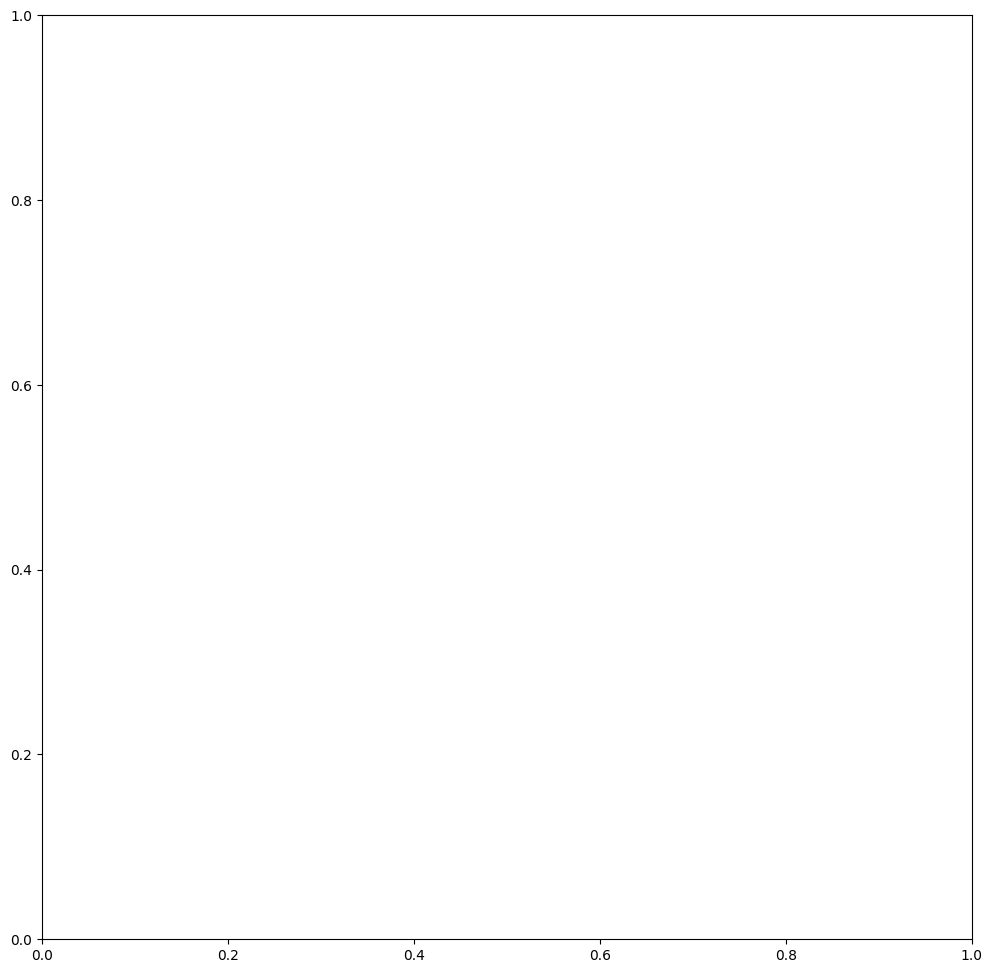

In [27]:
fig, ax = plt.subplots(figsize=(12, 12))
levels =np.arange(-1,5.1,0.1)
cf = ax.contourf(np.log(cld[7]),cmap='bone_r', levels = levels)
levels =np.arange(-4,2.1,0.1)
ax.contourf(np.log(aero[7]),cmap='hot_r', levels = levels)
# c=ax.contour(cld[7].data,levels =[65535],colors='k')

formatter = LogFormatter(10, labelOnlyBase=False) 
cbar = fig.colorbar(cf,ticks =np.arange(-1,5,1), format = formatter)
cbar.ax.set_yticklabels([10.0**cx for cx in np.arange(-1,5,1)])
ax.invert_yaxis()
ax.axis('off')


# plt.colorbar(cf)
plt.title('Cloud Optical Depth - Korea Domain')
# ax.quiver(vlon[0], vlat[0], uw[0], vw[0],
#           units='xy', scale=30., zorder=3, color='r',
#           width=0.07, headwidth=5., headlength=4.)

Text(0.5, 1.0, 'Aerosol Optical Depth - Korea Domain')

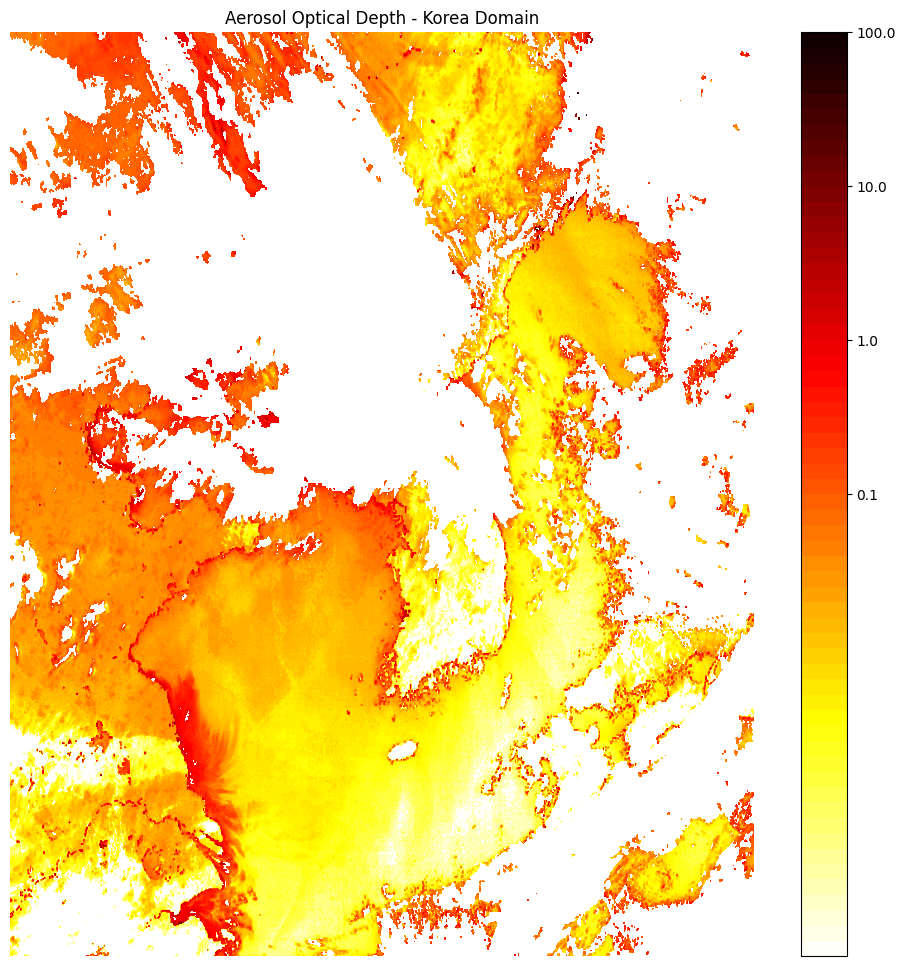

In [24]:
fig, ax = plt.subplots(figsize=(12, 12))
levels =np.arange(-4,2.1,0.1)
cf = ax.contourf(np.log(aero[7]),cmap='hot_r', levels = levels)
# c=ax.contour(cld[7].data,levels =[65535],colors='k')

formatter = LogFormatter(10, labelOnlyBase=False) 
cbar = fig.colorbar(cf,ticks =np.arange(-1,3,1), format = formatter)
cbar.ax.set_yticklabels([10.0**cx for cx in np.arange(-1,3,1)])
ax.invert_yaxis()
ax.axis('off')


# plt.colorbar(cf)
plt.title('Aerosol Optical Depth - Korea Domain')
# ax.quiver(vlon[0], vlat[0], uw[0], vw[0],
#           units='xy', scale=30., zorder=3, color='r',
#           width=0.07, headwidth=5., headlength=4.)

/tmp/ipykernel_17279/2299136927.py:3: RuntimeWarning: divide by zero encountered in log
  cf = ax.contourf(np.log(dust[8]),cmap='OrRd', levels = levels)


Text(0.5, 1.0, 'Dust Optical Depth - Korea Domain')

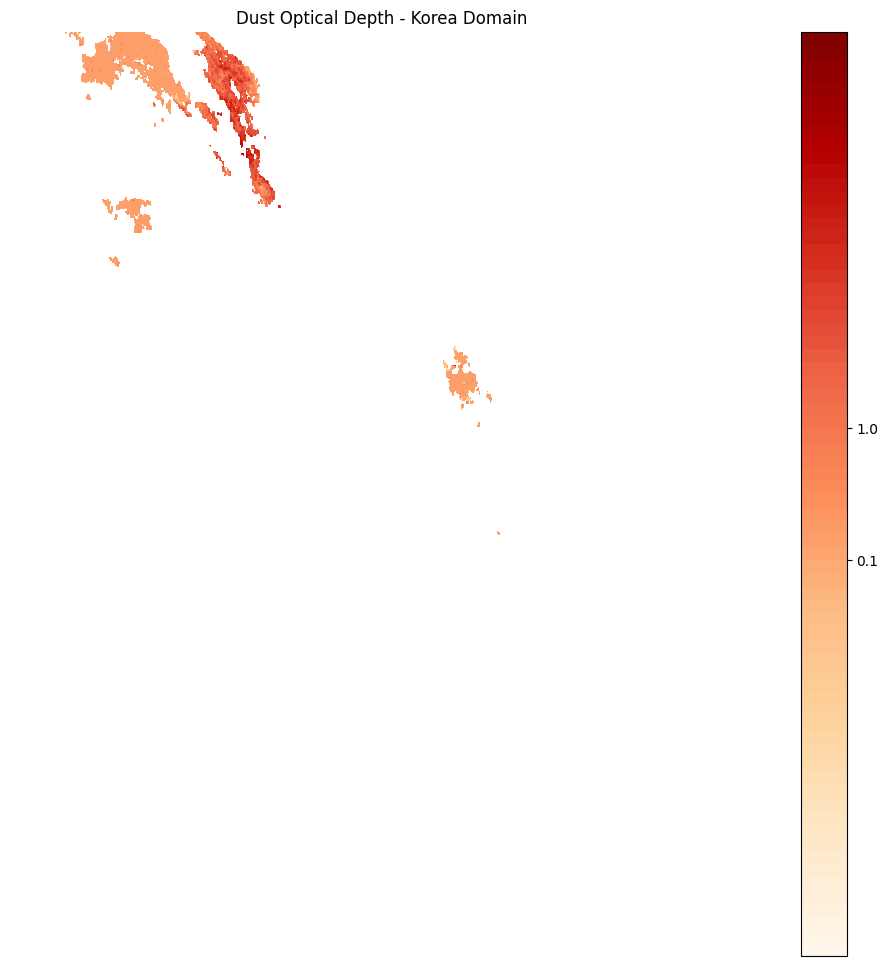

In [22]:
fig, ax = plt.subplots(figsize=(12, 12))
levels =np.arange(-4,3.1,0.1)
cf = ax.contourf(np.log(dust[8]),cmap='OrRd', levels = levels)
# c=ax.contour(cld[7].data,levels =[65535],colors='k')

formatter = LogFormatter(10, labelOnlyBase=False) 
cbar = fig.colorbar(cf,ticks =np.arange(-1,1,1), format = formatter)
cbar.ax.set_yticklabels([10.0**cx for cx in np.arange(-1,1,1)])
ax.invert_yaxis()
ax.axis('off')


# plt.colorbar(cf)
plt.title('Dust Optical Depth - Korea Domain')
# ax.quiver(vlon[0], vlat[0], uw[0], vw[0],
#           units='xy', scale=30., zorder=3, color='r',
#           width=0.07, headwidth=5., headlength=4.)

In [293]:
lat.shape

(2600, 3000)

## Data cost check

In [ ]:
a =( 9.4 + 7 + 5.5 +7+18)/ 5.5

In [ ]:
yk = 27.5 * 6 * 24*31 / 1024 * 0.023 * a 
ye = 53 * 6 * 24*31 / 1024 * 0.023 * a
yf = 202 * 6 * 24*31 / 1024 * 0.023 * a
print(yk,ye,yf)

In [ ]:
x = np.arange(0, 31, 1)
yk = 27.5* x * 6 * 24 / 1024 * 0.023 *a 
ye = 53 * x * 6 * 24 / 1024 * 0.023*a
yf = 202 * x * 6 * 24 / 1024 * 0.023*a

plt.plot(x,yf,label='Full Disk')
plt.plot(x,ye,label='EastAsia')
plt.plot(x,yk,label='Korea')

plt.title('Satellite Data Capacity For Each Domain')
plt.xlabel('days')
plt.ylabel('data capacity(GB)')
plt.xlim(0,30)
plt.grid(axis = 'y', linestyle ='--')
plt.legend()